In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("diabetes.csv")

In [3]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos
5,5,116,74,0,0,25.6,0.201,30,neg
6,3,78,50,32,88,31.0,0.248,26,pos
7,10,115,0,0,0,35.3,0.134,29,neg
8,2,197,70,45,543,30.5,0.158,53,pos
9,8,125,96,0,0,0.0,0.232,54,pos


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Diabetes                    768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
dataset.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12  

In [6]:
#check for any missing value
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Diabetes                    False
dtype: bool

In [7]:
dataset['Diabetes'].unique()

array(['pos', 'neg'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Diabetes'] = le.fit_transform(dataset['Diabetes'])

In [9]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
x = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8:9].values

In [11]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
x.shape

(768, 8)

In [13]:
#split the data to train and set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state= 0)

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[87, 20],
       [16, 31]], dtype=int64)

In [21]:
import sklearn.metrics as metrics
fpr, tpr, threshold1 = metrics.roc_curve(y_test,y_pred) #fpr = false positive rate, trp = true positive rate 
roc_auc1 = metrics.auc(fpr,tpr)

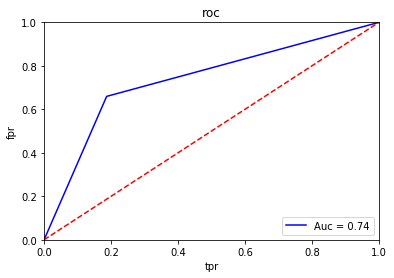

In [23]:
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr,tpr,'b',label = 'Auc = %0.2f'% roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

In [24]:
#find the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7662337662337663

In [25]:
#predict own values
y_own = classifier.predict([[2,140,75,28,160,21.1,0.241,60]])

In [26]:
y_own

array([0])